# EDA and Fraud Analysis using Machine learning models



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns                         
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import missingno as ms
import matplotlib.pyplot as plt
%matplotlib inline




In [2]:
df=pd.read_csv('Synthetic_Financial_datasets_log.csv')


In [3]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Exploratory Analysis

In [4]:
df.shape

(6362620, 11)

In [5]:
df.memory_usage().sum()/(1024*1024*1024)
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.6 GB


In [6]:
df.isnull().sum()# checking the missing value of particular column

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
cols=['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'
     ]

table= df.pivot_table(columns='type', values=cols)
table.style.background_gradient(cmap='viridis')

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
amount,168920.242004,176273.964346,5483.665314,13057.604660,910647.009645
isFlaggedFraud,0.000000,0.000000,0.000000,0.000000,0.000030
isFraud,0.000000,0.001840,0.000000,0.000000,0.007688
newbalanceDest,1467105.385239,1691326.068407,1513003.468022,0.000000,3554566.827545
newbalanceOrig,3759378.712079,17474.192737,65161.651963,61837.890911,10288.156703
oldbalanceDest,1587918.796498,1497757.887632,1493135.771269,0.000000,2567605.721313
oldbalanceOrg,3590463.508299,46023.804795,68647.337126,68216.827573,54441.851725
step,244.490093,240.900735,248.440481,244.378179,246.657304


#### Category_wise statistical anlysis

In [10]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
# The category type holds the type of ransaction that include, CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER

<AxesSubplot:>

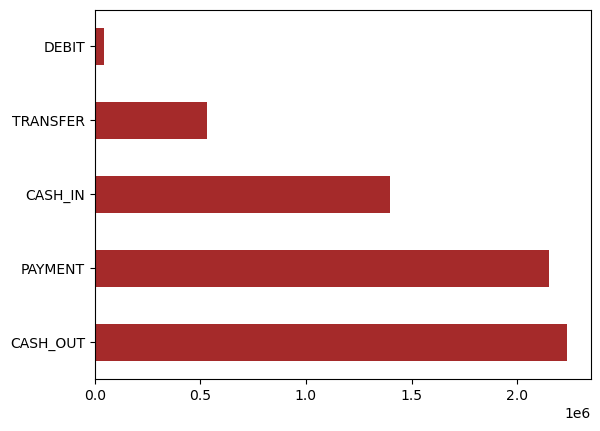

In [12]:
df['type'].value_counts()[:10].plot(kind='barh', color='brown')# counting the first 10 row of the type of transaction


In [13]:
Transaction_type=df[df['type']== 'PAYMENT']
Transaction_type.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2151495.0,2151495.0,2151495.0,2151495.0
mean,2.443782e+02,1.305760e+04,6.821683e+04,6.183789e+04,0.0,0.0,0.0,0.0
std,1.426951e+02,1.255645e+04,1.989911e+05,1.969915e+05,0.0,0.0,0.0,0.0
min,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
25%,1.560000e+02,4.383820e+03,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
50%,2.490000e+02,9.482190e+03,1.053000e+04,0.000000e+00,0.0,0.0,0.0,0.0
75%,3.350000e+02,1.756122e+04,6.088300e+04,4.965413e+04,0.0,0.0,0.0,0.0
max,7.180000e+02,2.386380e+05,4.368662e+07,4.367380e+07,0.0,0.0,0.0,0.0


In [14]:
Transaction_type=df[df['type']=='TRANSFER']
Transaction_type.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,532909.000000,5.329090e+05,5.329090e+05,5.329090e+05,5.329090e+05,5.329090e+05,532909.000000,532909.000000
mean,246.657304,9.106470e+05,5.444185e+04,1.028816e+04,2.567606e+06,3.554567e+06,0.007688,0.000030
std,145.015876,1.879574e+06,4.399818e+05,2.623603e+05,6.037846e+06,7.387614e+06,0.087344,0.005479
min,1.000000,2.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,2.159054e+05,0.000000e+00,0.000000e+00,2.249354e+05,7.536934e+05,0.000000,0.000000
50%,250.000000,4.863084e+05,0.000000e+00,0.000000e+00,1.015903e+06,1.725375e+06,0.000000,0.000000
75%,346.000000,9.749580e+05,2.626600e+04,0.000000e+00,2.753798e+06,3.795986e+06,0.000000,0.000000
max,743.000000,9.244552e+07,5.958504e+07,4.958504e+07,3.553805e+08,3.560159e+08,1.000000,1.000000


In [15]:
Transaction_type=df[df['type']=='CASH_IN']
Transaction_type.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.399284e+06,1.399284e+06,1.399284e+06,1.399284e+06,1.399284e+06,1.399284e+06,1399284.0,1399284.0
mean,2.444901e+02,1.689202e+05,3.590464e+06,3.759379e+06,1.587919e+06,1.467105e+06,0.0,0.0
std,1.429260e+02,1.265083e+05,5.291825e+06,5.287487e+06,3.713923e+06,3.712985e+06,0.0,0.0
min,1.000000e+00,4.000000e-02,0.000000e+00,5.440000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,1.560000e+02,7.051018e+04,3.776800e+04,2.497569e+05,1.612608e+05,4.274628e+04,0.0,0.0
50%,2.490000e+02,1.434277e+05,1.200093e+06,1.369115e+06,5.471373e+05,3.857514e+05,0.0,0.0
75%,3.450000e+02,2.398991e+05,5.284255e+06,5.450491e+06,1.619594e+06,1.465846e+06,0.0,0.0
max,7.180000e+02,1.915268e+06,3.893942e+07,3.894623e+07,3.555534e+08,3.553814e+08,0.0,0.0


In [16]:
Transaction_type=df[df['type']=='CASH_OUT']
Transaction_type.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.237500e+06,2.237500e+06,2.237500e+06,2.237500e+06,2.237500e+06,2.237500e+06,2.237500e+06,2237500.0
mean,2.409007e+02,1.762740e+05,4.602380e+04,1.747419e+04,1.497758e+06,1.691326e+06,1.839553e-03,0.0
std,1.407754e+02,1.753297e+05,1.791326e+05,1.091940e+05,3.633876e+06,3.663008e+06,4.285055e-02,0.0
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.550000e+02,7.266965e+04,0.000000e+00,0.000000e+00,1.146859e+05,2.858970e+05,0.000000e+00,0.0
50%,2.360000e+02,1.470722e+05,5.560000e+02,0.000000e+00,4.880985e+05,6.876067e+05,0.000000e+00,0.0
75%,3.320000e+02,2.465395e+05,3.144624e+04,0.000000e+00,1.510450e+06,1.741879e+06,0.000000e+00,0.0
max,7.430000e+02,1.000000e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,1.000000e+00,0.0


In [17]:
Transaction_type=df[df['type']=='DEBIT']
Transaction_type.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,41432.000000,41432.000000,4.143200e+04,4.143200e+04,4.143200e+04,4.143200e+04,41432.0,41432.0
mean,248.440481,5483.665314,6.864734e+04,6.516165e+04,1.493136e+06,1.513003e+06,0.0,0.0
std,149.843650,13318.535518,1.384493e+05,1.376566e+05,4.386970e+06,4.395708e+06,0.0,0.0
min,1.000000,0.550000,0.000000e+00,0.000000e+00,8.500000e+01,0.000000e+00,0.0,0.0
25%,153.000000,1500.180000,1.518500e+03,0.000000e+00,1.300251e+05,1.365075e+05,0.0,0.0
50%,252.000000,3048.990000,2.082111e+04,1.663242e+04,4.244604e+05,4.393289e+05,0.0,0.0
75%,350.000000,5479.175000,6.880661e+04,6.263080e+04,1.372975e+06,1.404072e+06,0.0,0.0
max,718.000000,569077.510000,4.362014e+06,4.359375e+06,3.278278e+08,3.278521e+08,0.0,0.0


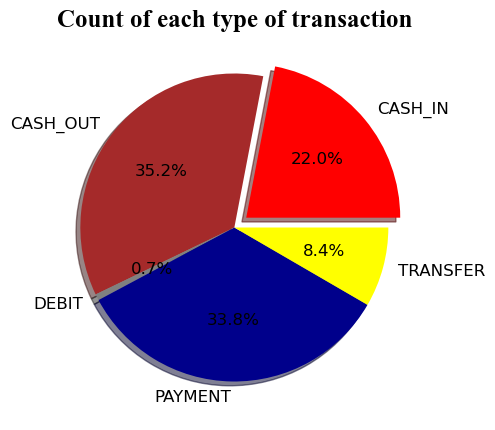

In [18]:
counts = df.groupby('type').count()['amount']
plt.figure(figsize = (5,5))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%", colors=['red', 'brown', 'gray', 'darkblue','yellow'], shadow = True,explode = (0.1, 0, 0, 0, 0),textprops={'fontsize': 12})
plt.title('Count of each type of transaction', fontweight = 'bold', fontsize = 18, fontfamily = 'times new roman')
plt.show()

#### Box Plot

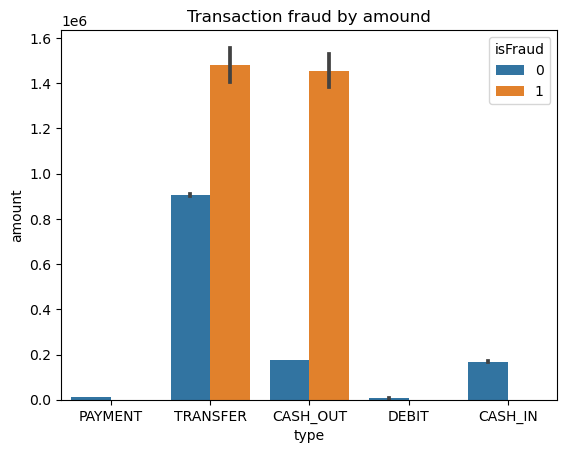

In [31]:
sns.barplot(data=df, x='type', y='amount', hue='isFraud')
plt.title('Transaction fraud by amount')
plt.show()





## Bulding machine learning models

In [ ]:
df.head(2)

In [ ]:
df.drop([ 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest'], axis = 1, inplace = True)

In [ ]:
df.head(5)

## Logistic Regression 

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

In [ ]:
# encoding the categorical column into numerical data
Label= LabelEncoder()
df['type'] =Label.fit_transform(df['type'])
# separating feature variables and class variables
X = df.drop('isFraud', axis = 1)
y = df['isFraud']
# standardizing the data
sc = StandardScaler()
X = sc.fit_transform(X)
# splitting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
predictions = model.predict(X_test)

### Measuring the Performance of the Model

In [ ]:

accuracy= accuracy_score(Y_test,predictions )
precision= precision_score(Y_test,predictions )
recall= recall_score(Y_test,predictions )
classification=classification_report(Y_test, predictions)


# print the performance matrix
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print(f"Classification Report of logistic regression\n {classification}")

In [ ]:
print(confusion_matrix(Y_test, predictions))

In [ ]:
! pip install xgboost

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [ ]:
model_x = XGBClassifier()
model_x.fit(X_train, Y_train)
print(model_x)

#### Predictions with XGBoost Model

In [ ]:
y_pred = model_x.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy_x = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy_x * 100.0))